In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics

In [27]:
df=pd.read_csv('/content/final_cleaned_data (1).csv')
df

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,operating,2005,3.000000,3.975000e+07,5.000000,17.0,47.606209,-122.332071,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
1,operating,2007,1.805575,1.582167e+07,1.415896,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,0,1,1,4745.0
2,operating,2008,1.805575,1.582167e+07,1.000000,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,0,1,0,1,6570.0
3,acquired,2007,1.000000,5.000000e+06,3.000000,14.0,37.386052,-122.083851,0,0,...,0,0,0,0,0,0,1,0,0,4745.0
4,operating,2008,1.805575,1.582167e+07,1.000000,3.0,33.078655,-116.601964,0,0,...,0,0,0,0,0,0,1,0,1,3285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,operating,2012,1.000000,5.275000e+05,1.000000,2.0,39.739236,-104.990251,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
16268,operating,2012,1.805575,1.582167e+07,1.000000,2.0,47.570655,-122.222067,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
16269,operating,1998,1.805575,1.582167e+07,1.415896,1.0,36.169941,-115.139830,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
16270,operating,2013,1.805575,1.582167e+07,2.000000,4.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,5110.0


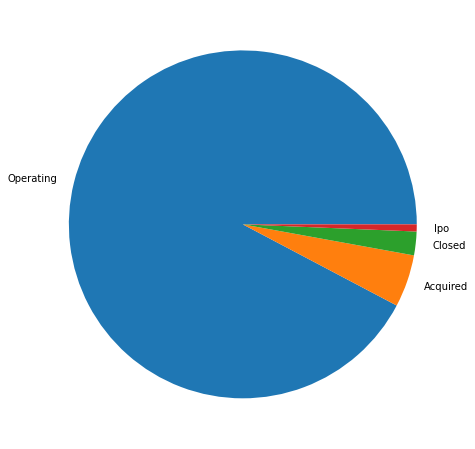

In [28]:
plt.figure(figsize=(8,8))
plt.pie(df['status'].value_counts()/len(df)*100,labels=['Operating','Acquired','Closed','Ipo'])
plt.show()

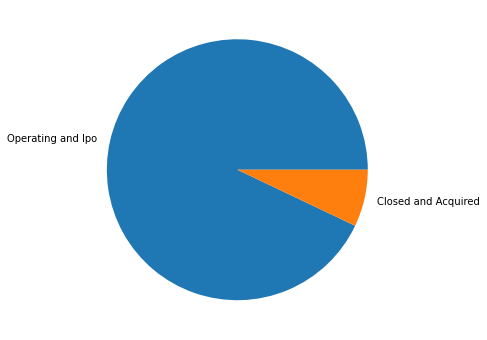

In [29]:
plt.figure(figsize=(6,6))
plt.pie(df['isClosed'].value_counts()/len(df)*100,labels=['Operating and Ipo','Closed and Acquired'])
plt.show()

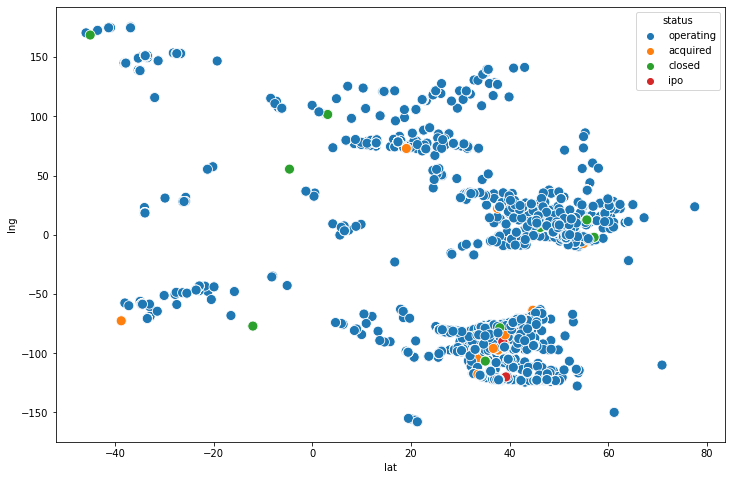

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='lat',y='lng', hue='status',s=100)
plt.show()

In [31]:
df.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_AUS', 'country_code_BRA', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_NLD', 'country_code_USA',
       'country_code_other', 'isClosed', 'active_days'],
      dtype='object')

In [32]:
bins=[]
for i in df['founded_at'].values:
  bins.append(i)
bins=np.unique(bins)
intervals=[0,1925,1950,1975,2000,2014]
labels=['Before 1925','from 1925 to 1950','from 1950 to 1975','from 1975 to 2000','After 2000']
df['founded_at_categorised']=pd.cut(df['founded_at'],intervals,labels=labels)
df

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days,founded_at_categorised
0,operating,2005,3.000000,3.975000e+07,5.000000,17.0,47.606209,-122.332071,0,0,...,0,0,0,0,0,1,0,1,5840.0,After 2000
1,operating,2007,1.805575,1.582167e+07,1.415896,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,1,1,4745.0,After 2000
2,operating,2008,1.805575,1.582167e+07,1.000000,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,1,0,1,6570.0,After 2000
3,acquired,2007,1.000000,5.000000e+06,3.000000,14.0,37.386052,-122.083851,0,0,...,0,0,0,0,0,1,0,0,4745.0,After 2000
4,operating,2008,1.805575,1.582167e+07,1.000000,3.0,33.078655,-116.601964,0,0,...,0,0,0,0,0,1,0,1,3285.0,After 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,operating,2012,1.000000,5.275000e+05,1.000000,2.0,39.739236,-104.990251,0,0,...,0,0,0,0,0,1,0,1,5110.0,After 2000
16268,operating,2012,1.805575,1.582167e+07,1.000000,2.0,47.570655,-122.222067,0,0,...,0,0,0,0,0,1,0,1,4745.0,After 2000
16269,operating,1998,1.805575,1.582167e+07,1.415896,1.0,36.169941,-115.139830,0,0,...,0,0,0,0,0,1,0,1,5110.0,from 1975 to 2000
16270,operating,2013,1.805575,1.582167e+07,2.000000,4.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,1,0,1,5110.0,After 2000


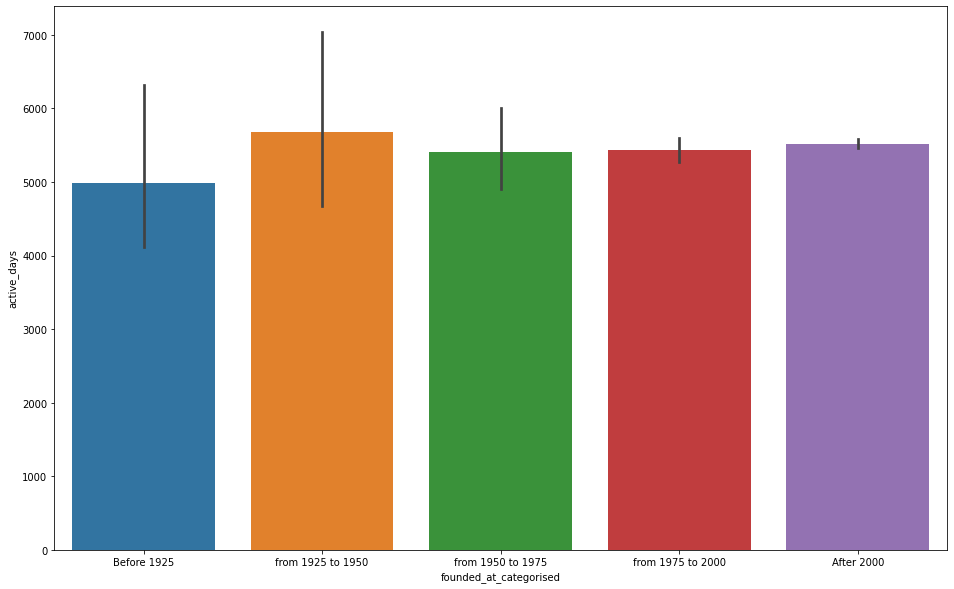

In [33]:
plt.figure(figsize=(16,10))
sns.barplot(x=df['founded_at_categorised'],y=df['active_days'])
plt.xticks()
plt.show()

In [34]:
df.drop('founded_at_categorised',axis=1,inplace=True)

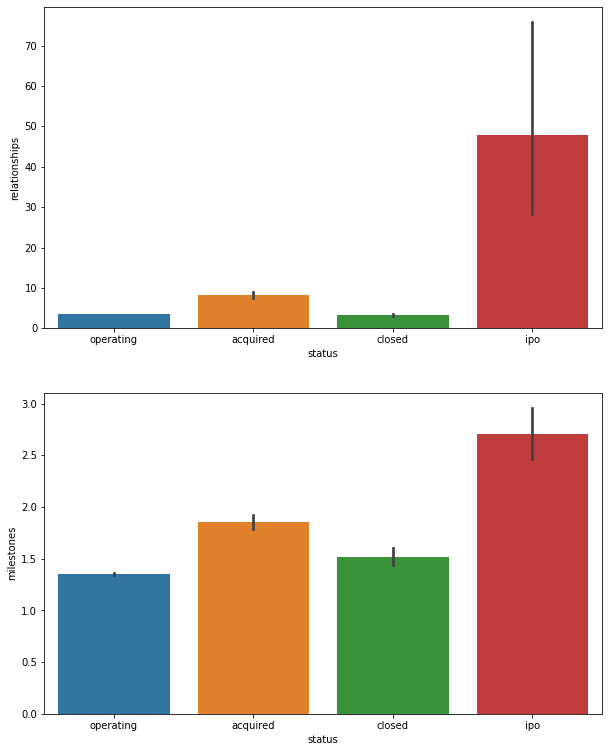

In [35]:
fig,axs=plt.subplots(2,figsize=(10,13))
sns.barplot(x=df['status'],y=df['relationships'],ax=axs[0])
sns.barplot(x=df['status'],y=df['milestones'],ax=axs[1])
plt.show()

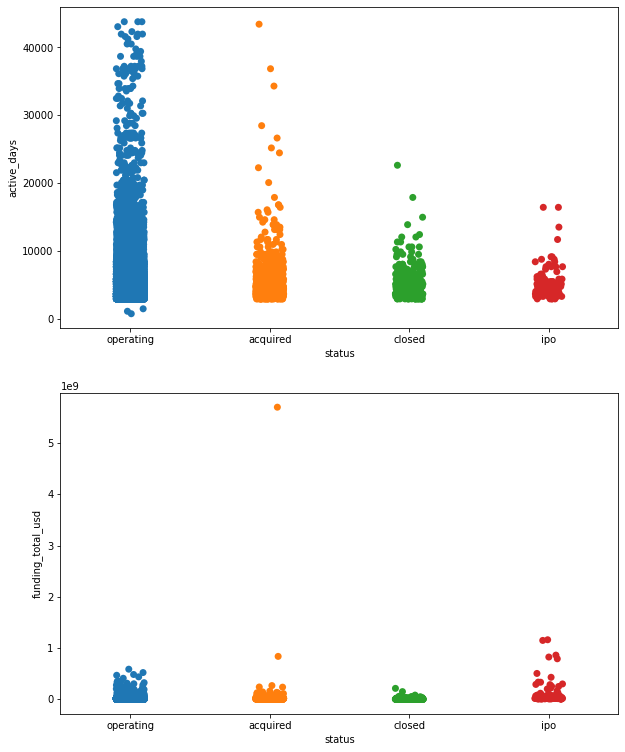

In [36]:
fig,axs=plt.subplots(2,figsize=(10,13))
sns.stripplot(data=df, x=df['status'], y=df['active_days'],s=7,ax=axs[0])
sns.stripplot(data=df, x=df['status'], y=df['funding_total_usd'],s=7,ax=axs[1])
plt.show()

In [37]:
df[['status']]=df[['status']].apply(LabelEncoder().fit_transform)

In [38]:
corrlist=df.corrwith(df['status']).abs().sort_values(ascending=False)
corrlist

status                            1.000000
isClosed                          0.977809
milestones                        0.194315
country_code_USA                  0.110722
founded_at                        0.108270
lng                               0.104533
relationships                     0.097846
country_code_other                0.066703
funding_total_usd                 0.052265
funding_rounds                    0.051805
category_code_web                 0.046459
country_code_IND                  0.042661
category_code_consulting          0.039942
category_code_education           0.038987
category_code_ecommerce           0.036243
country_code_GBR                  0.030255
lat                               0.029018
country_code_BRA                  0.026254
country_code_ESP                  0.025174
country_code_AUS                  0.021579
category_code_other               0.018429
category_code_mobile              0.016932
category_code_network_hosting     0.015848
category_co

In [16]:
# listing=corrlist.index

In [15]:
# n=17
# listlar = listing[len(listing)-n:]
# df.drop(listlar,axis=1,inplace=True)

In [14]:
# df.corrwith(df['status']).abs().sort_values(ascending=False)

In [18]:
# corrm=df.corr().abs()
# plt.figure(figsize=(24,16))
# sns.heatmap(corrm, cmap="coolwarm", annot=True)
# plt.plot()

In [39]:
df.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_AUS', 'country_code_BRA', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_NLD', 'country_code_USA',
       'country_code_other', 'isClosed', 'active_days'],
      dtype='object')

In [40]:
X=df.drop('status',axis=1)
Y=df['status'].copy()

In [41]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, Y)
mutual_info

array([2.68506367e-02, 2.10601803e-02, 2.77223861e-02, 2.16052822e-02,
       3.20123391e-02, 1.23206093e-02, 1.73080710e-02, 0.00000000e+00,
       4.95333137e-03, 2.18331407e-03, 7.33412159e-05, 0.00000000e+00,
       7.02680909e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.39791888e-03, 0.00000000e+00, 0.00000000e+00, 3.19455956e-04,
       0.00000000e+00, 6.09991731e-04, 0.00000000e+00, 3.54306152e-04,
       1.47943423e-03, 0.00000000e+00, 3.24926495e-03, 0.00000000e+00,
       2.35606586e-03, 0.00000000e+00, 0.00000000e+00, 9.20235368e-04,
       6.68042866e-03, 3.40812694e-03, 2.58752497e-01, 0.00000000e+00])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
milist=mutual_info.sort_values(ascending=False)
milist

isClosed                          0.258752
relationships                     0.032012
funding_total_usd                 0.027722
founded_at                        0.026851
milestones                        0.021605
funding_rounds                    0.021060
lng                               0.017308
lat                               0.012321
country_code_USA                  0.006680
category_code_consulting          0.004953
country_code_other                0.003408
country_code_FRA                  0.003249
country_code_IND                  0.002356
category_code_ecommerce           0.002183
country_code_DEU                  0.001479
category_code_other               0.001398
country_code_NLD                  0.000920
category_code_games_video         0.000703
country_code_AUS                  0.000610
country_code_CAN                  0.000354
category_code_software            0.000319
category_code_education           0.000073
country_code_ISR                  0.000000
country_cod

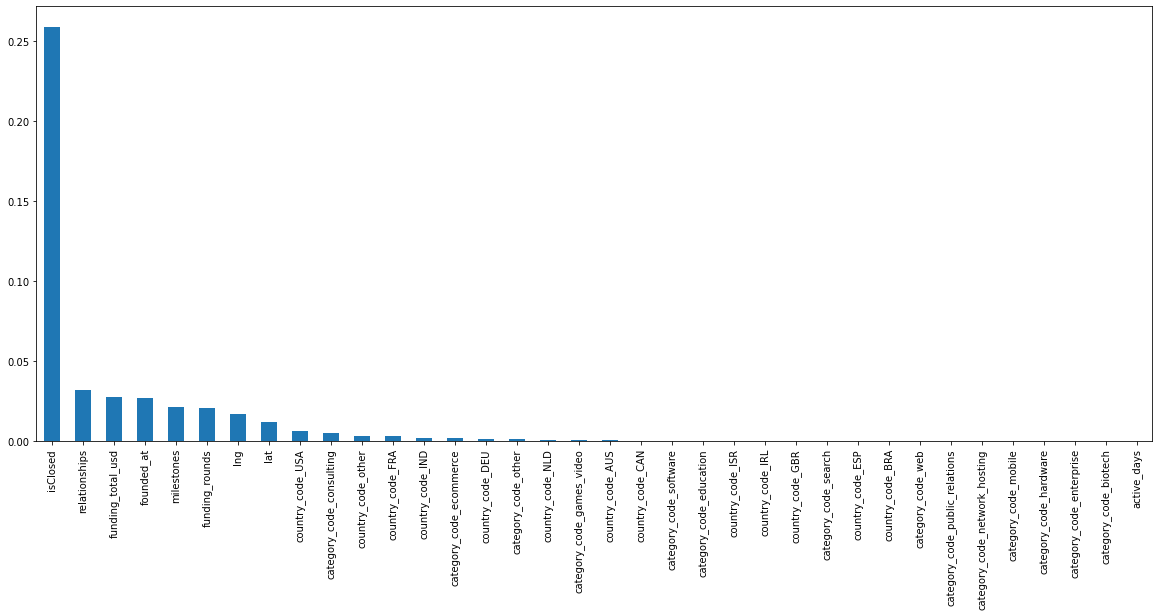

In [43]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [45]:
listing=milist.index
n=15
listlar = listing[len(listing)-n:]
df.drop(listlar,axis=1,inplace=True)

In [47]:
df.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_games_video',
       'category_code_other', 'category_code_software', 'country_code_AUS',
       'country_code_CAN', 'country_code_DEU', 'country_code_FRA',
       'country_code_IND', 'country_code_NLD', 'country_code_USA',
       'country_code_other', 'isClosed'],
      dtype='object')

In [48]:
poly=StandardScaler()
X=poly.fit_transform(X)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression
logistics=LogisticRegression()

In [51]:
param_grid = [    
    {
    'C' : np.logspace(-4, 20),
    'max_iter' : [1500, 2500]
    }
]

In [52]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistics, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [53]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [54]:
best_clf.best_estimator_

LogisticRegression(C=0.08685113737513521, max_iter=1500)

In [55]:
print (f'Accuracy - : {best_clf.score(x_train,y_train):.3f}')

Accuracy - : 0.977


In [56]:
model=LogisticRegression(C=0.08685113737513521, max_iter=1500)
model.fit(x_train,y_train)

LogisticRegression(C=0.08685113737513521, max_iter=1500)

In [57]:
y_predicted=model.predict(x_test)

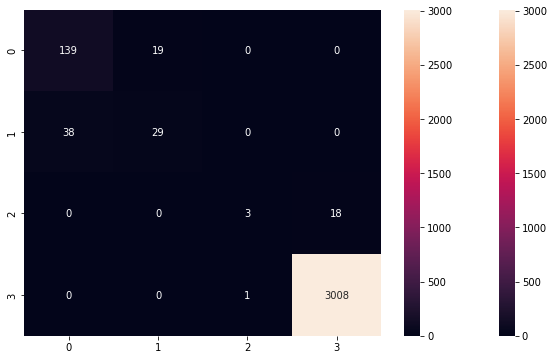

In [59]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       158
           1       0.60      0.43      0.50        67
           2       0.75      0.14      0.24        21
           3       0.99      1.00      1.00      3009

    accuracy                           0.98      3255
   macro avg       0.78      0.61      0.64      3255
weighted avg       0.97      0.98      0.97      3255

Accuracy:  0.9766513056835637
